# Digit Recognition using Deep Learning and Convolutional Networks.

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2 as cv
import os
import matplotlib.pyplot as plt
import numpy as np

## Training the model on MNIST

In [2]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [3]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [4]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(10, (3, 3)),#, input_shape=(28, 28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax()
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),#from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model.fit(
    ds_train,
    epochs=3,
    #validation_data=ds_test,
)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 46ms/step - loss: 0.4017 - sparse_categorical_accuracy: 0.8829
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - loss: 0.1101 - sparse_categorical_accuracy: 0.9668
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - loss: 0.0698 - sparse_categorical_accuracy: 0.9787


## Evaluate model on MNIST test set

In [6]:
score = model.evaluate(ds_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


loss= 0.09519213438034058
accuracy= 0.9711999893188477


## Predictions on our own student IDs

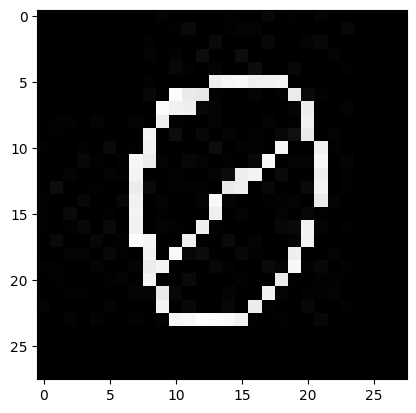

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction for previous image 0


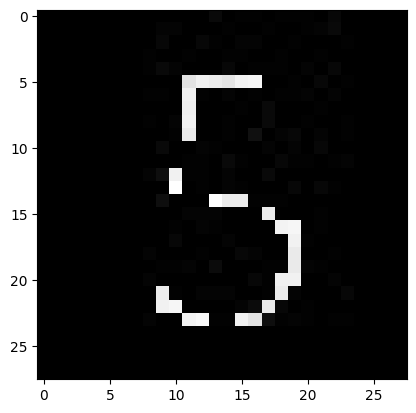

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction for previous image 5


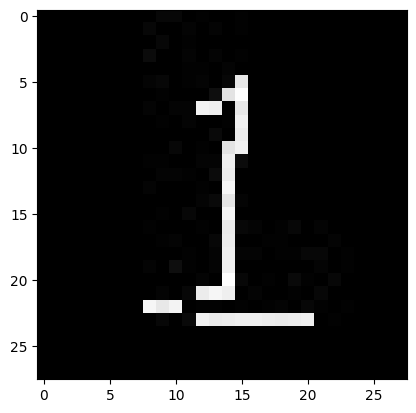

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for previous image 1


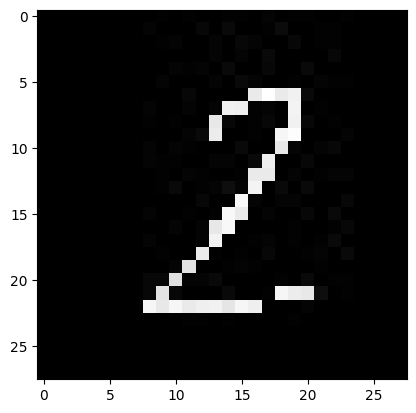

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Prediction for previous image 1


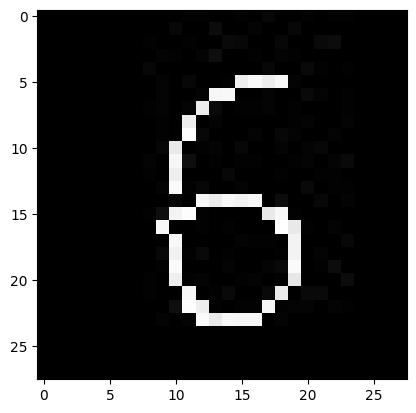

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Prediction for previous image 5


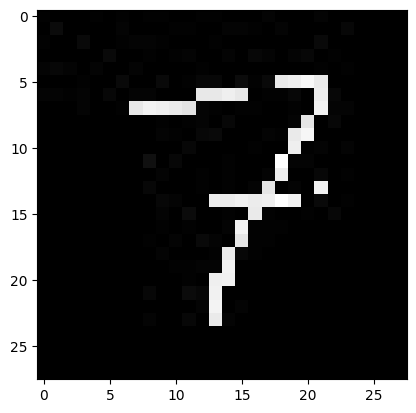

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for previous image 7


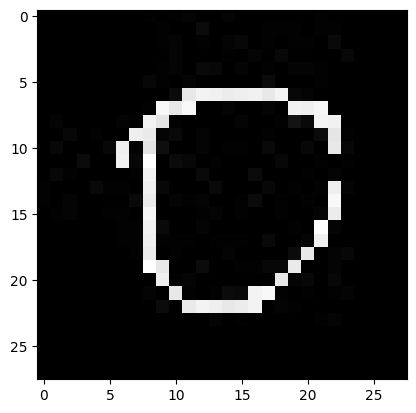

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Prediction for previous image 5


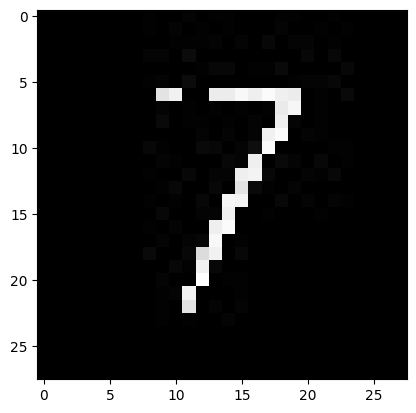

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction for previous image 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [28]:
all_preds = []

for person in ['Den', 'Luis', 'Rivers']:
    curr_preds = []
    for file in sorted(os.listdir(f'TestSet/{person}')):
        if file[-4:] != '.jpg':
            continue

        xd = cv.imread(f'TestSet/{person}/{file}', cv.IMREAD_GRAYSCALE)
        xd = xd.astype(np.float16) / 255.0
        if person == 'Den':
            plt.imshow(xd, cmap='gray')
            plt.show()
        xdd = xd.reshape((1, 28, 28))
        pred = model.predict(xdd)[0].tolist()
        ind_pred = pred.index(max(pred))
        curr_preds += [ind_pred]
        if person == 'Den':
            print(f'Prediction for previous image {ind_pred}')
    all_preds += [curr_preds]

## Evaluating the model with our student IDs

In [27]:
preds = np.array(all_preds).flatten()
print(preds, 'Predictions')

ground_truth = np.array([0, 5, 1, 2, 6, 7, 0, 7, 1, 0, 8, 7, 3, 4, 8, 2, 0, 3, 5, 1, 7, 8, 9, 6])
print(ground_truth, 'Ground truth')
from sklearn.metrics import classification_report

print(classification_report(ground_truth, preds))




[0 5 1 1 5 7 5 7 1 2 9 7 3 4 5 2 2 3 5 1 7 4 9 6] Predictions
[0 5 1 2 6 7 0 7 1 0 8 7 3 4 8 2 0 3 5 1 7 8 9 6] Ground truth
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.75      1.00      0.86         3
           2       0.33      0.50      0.40         2
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1
           5       0.40      1.00      0.57         2
           6       1.00      0.50      0.67         2
           7       1.00      1.00      1.00         4
           8       0.00      0.00      0.00         3
           9       0.50      1.00      0.67         1

    accuracy                           0.67        24
   macro avg       0.65      0.72      0.62        24
weighted avg       0.70      0.67      0.62        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Discussion and Conclusion
Classes 0, 3, 6 and 7 had a perfect precision, which means that every time the model predicted these digits, it was correct. Classes 1, 3, 4, 5, 7 and 9 had a recall of 1, which means that the model managed to identify all the cases in our IDs where these digits were present. Digits 2 and eight were particularly challenging, our hypothesis is that the model confused 2 with 0 and several numbers with eight, like 4, 5, and 9, because of the similarities these have with eight.

So, out of all the digits in our three ids, the model manages to correctly identify 67% of them, which is better than a random prediction, because a random prediction would get a 10% accuracy, but nevertheless, there is a very clear room for improvement. To get better results, more experiments should be carried out with different neural network architectures, and more strategies that allow the digits to be as clear as possible should be explored.